# Imports

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot

warnings.simplefilter('ignore')

# Constant

In [2]:
DATASET_PATH = '/kaggle/input/stock-exchange-data/indexData.csv'
NEW_YORK_STOCK_EXCHANGE_CODE = 'NYA'

# Code

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head(5)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [4]:
stocks_data = df[df['Index'] == NEW_YORK_STOCK_EXCHANGE_CODE]
stocks_data.size

111584

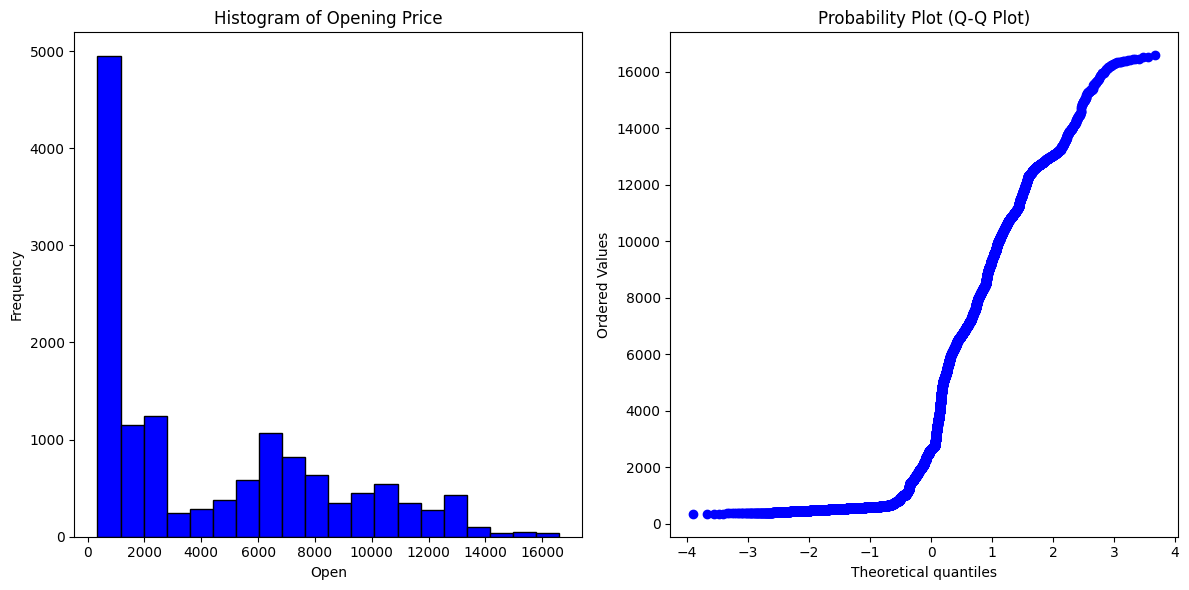

Opening Price is normally distributed (fail to reject H0)


In [5]:
# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(stocks_data['Open'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Opening Price')
plt.xlabel('Open')
plt.ylabel('Frequency')

# Plot probability plot (quantile-quantile plot)
plt.subplot(1, 2, 2)
probplot(stocks_data['Open'], dist='norm', plot=plt)
plt.title('Probability Plot (Q-Q Plot)')

# Show the plots
plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test
stat, p_value = shapiro(stocks_data['Open'])

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value > alpha:
    print("Opening Price is normally distributed (fail to reject H0)")
else:
    print("Opening Price is not normally distributed (reject H0)")